In [15]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
plt.style.use('classic')

% matplotlib inline
%load_ext autoreload
% autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
asso_IE50_reci = pd.read_pickle('/data/ana_asso_IE_50Hz_reci')
asso_IE50_uni = pd.read_pickle('/data/ana_asso_IE_50Hz_uni')
asso_IE50 = pd.read_pickle('/data/ana_asso_IE_50Hz')

In [3]:
asso_IE50_reci

,Before,After,File name,elimi
45,"{'decay_tau': [0.00334779170449, 0.00328880696...","{'decay_tau': [0.00365361540795, 0.00407158981...",2016100202,40
46,"{'decay_tau': [0.00447402170222, 0.00486594568...","{'decay_tau': [0.00454441137367, 0.00483600894...",2016110202,40
47,"{'decay_tau': [0.00295601846652, 0.00358704354...","{'decay_tau': [0.0053999235371, 0.004712013556...",2016111103,40
48,"{'decay_tau': [0.00588643817762, 0.00665804623...","{'decay_tau': [0.00619812147397, 0.00610908988...",2016111802,30
50,"{'decay_tau': [0.00360597307688, 0.00402653018...","{'decay_tau': [0.0035290516827, 0.003856289413...",2016111104,15


In [4]:
asso_IE50_uni

,Before,After,File name,elimi
40,"{'decay_tau': [0.00520168157154, 0.00497147485...","{'decay_tau': [0.00454047765834, 0.00508521489...",2016102702,40
41,"{'decay_tau': [0.00348259795091, 0.00361123581...","{'decay_tau': [0.00384872345028, 0.00429361895...",2016111001,55
42,"{'decay_tau': [0.00468652690829, 0.00379889821...","{'decay_tau': [nan, nan, 0.00488407316983, 0.0...",2016120201,40
43,"{'decay_tau': [0.00228455530349, 0.00221348352...","{'decay_tau': [0.00325667118212, 0.00314984594...",2016120501,50
44,"{'decay_tau': [0.00398801942669, 0.00444855436...","{'decay_tau': [0.00453720425605, 0.00424815992...",2017050901,50
49,"{'decay_tau': [0.00249960485242, 0.00276167693...","{'decay_tau': [nan, 0.00356409645083, 0.003027...",2016100203,15
51,"{'decay_tau': [0.00561143264517, 0.00576544202...","{'decay_tau': [0.00728235483784, 0.00683708323...",2016120403,20


In [5]:
asso_IE50

,Before,After,File name,elimi
40,"{'decay_tau': [0.00520168157154, 0.00497147485...","{'decay_tau': [0.00454047765834, 0.00508521489...",2016102702,40
41,"{'decay_tau': [0.00348259795091, 0.00361123581...","{'decay_tau': [0.00384872345028, 0.00429361895...",2016111001,55
42,"{'decay_tau': [0.00468652690829, 0.00379889821...","{'decay_tau': [nan, nan, 0.00488407316983, 0.0...",2016120201,40
43,"{'decay_tau': [0.00228455530349, 0.00221348352...","{'decay_tau': [0.00325667118212, 0.00314984594...",2016120501,50
44,"{'decay_tau': [0.00398801942669, 0.00444855436...","{'decay_tau': [0.00453720425605, 0.00424815992...",2017050901,50
49,"{'decay_tau': [0.00249960485242, 0.00276167693...","{'decay_tau': [nan, 0.00356409645083, 0.003027...",2016100203,15
51,"{'decay_tau': [0.00561143264517, 0.00576544202...","{'decay_tau': [0.00728235483784, 0.00683708323...",2016120403,20
45,"{'decay_tau': [0.00334779170449, 0.00328880696...","{'decay_tau': [0.00365361540795, 0.00407158981...",2016100202,40
46,"{'decay_tau': [0.00447402170222, 0.00486594568...","{'decay_tau': [0.00454441137367, 0.00483600894...",2016110202,40
47,"{'decay_tau': [0.00295601846652, 0.00358704354...","{'decay_tau': [0.0053999235371, 0.004712013556...",2016111103,40


/src/Patch_ana/Patch_ana/patch_pip.py:489: RuntimeWarning: Mean of empty slice
  ave_ptl_mean = np.nanmean(ave_ptl_resp_rm, axis=0)
/usr/local/lib/python3.5/dist-packages/numpy/lib/nanfunctions.py:1423: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


<Container object of 3 artists>

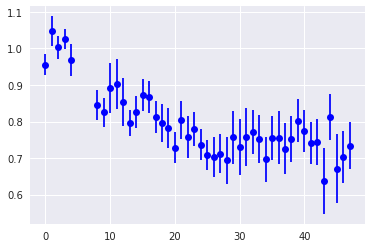

In [6]:
ave_ptl_resp = np.ones((len(asso_IE50), 60))*np.nan

ave_ptl_mean_2,ave_ptl_ste_2, ave_ptl_2 = patch_pip.samp_ave(asso_IE50, ave_ptl_resp)
ave_ptl_mean_2 = ave_ptl_mean_2[:-12]
ave_ptl_ste_2 = ave_ptl_ste_2[:-12]
ave_ptl_2 = ave_ptl_2[:, :-12]

plt.errorbar(x=np.arange(len(ave_ptl_mean_2)), y=ave_ptl_mean_2, yerr=ave_ptl_ste_2, fmt='bo')

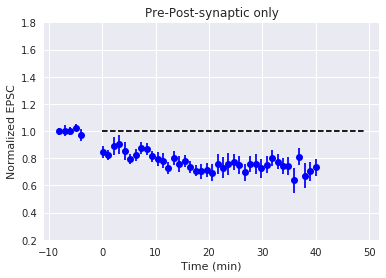

In [11]:
ave_ptl_mean_2cp, ave_ptl_ste_2cp =  ave_ptl_mean_2, ave_ptl_ste_2
ave_ptl_mean, ave_ptl_ste = patch_pip.pro_bef(ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5])
ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.linspace(-6 * 4/3, len(ave_ptl_mean_2cp) - 6 * 4/3, len(ave_ptl_mean_2cp)), y=ave_ptl_mean_2cp, yerr=ave_ptl_ste_2cp, fmt='bo', label='2Hz (n={a})'.format(a=len(asso_IE50)))

plt.plot(np.ones((50))*1, 'k--')
plt.xlabel('Time (min)')
plt.ylabel('Normalized EPSC')
# plt.legend()
plt.ylim([0.2, 1.8])
plt.title('Pre-Post-synaptic only')


(0, 3)

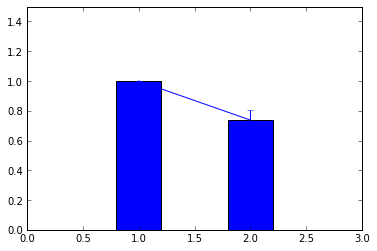

In [16]:
# Compare amplitude
mean_amp_aft_2Hz = np.nanmean(np.nanmean(ave_ptl_2[:, -10:], axis=1))

std_amp_aft_2Hz = np.nanstd(np.nanmean(ave_ptl_2[:, -10:], axis=1))/np.sqrt(6)
plt.bar([1,2], [1, mean_amp_aft_2Hz], align='center', width=0.4)
plt.errorbar(x=[1,2], y=[1, mean_amp_aft_2Hz],yerr = [0, std_amp_aft_2Hz], fmt='')
plt.ylim([0,1.5])
plt.xlim([0, 3])


(0, 3)

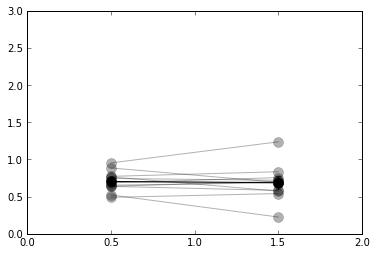

In [19]:
# Compare PPR
mean_PPR_bef = [np.nanmean(asso_IE50['Before'].loc[i]['PPR']) for i in asso_IE50['Before'].index]
mean_PPR_aft = [np.nanmean(asso_IE50['After'].loc[i]['PPR'][-10:]) for i in asso_IE50['After'].index]

mean_PPR_ave_bef = np.mean(mean_PPR_bef)
mean_PPR_std_bef = np.std(mean_PPR_bef)/np.sqrt(6)
mean_PPR_ave_aft = np.mean(mean_PPR_aft)
mean_PPR_std_aft = np.std(mean_PPR_aft)/np.sqrt(6)

for i, j in zip(mean_PPR_bef, mean_PPR_aft):
    plt.plot([0.5,1.5], [i, j], 'ko-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [mean_PPR_ave_bef, mean_PPR_ave_aft], [mean_PPR_std_bef, mean_PPR_std_aft], fmt='k-o', markersize=10)
plt.xlim([0,2])
plt.ylim([0,3])

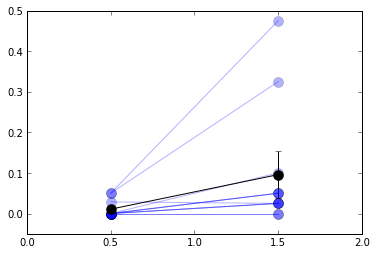

In [20]:
# Compare failure rate
mean_fail_bef = [np.sum(asso_IE50['Before'].loc[i]['failure'])/len(asso_IE50['Before'].loc[i]['failure']) for i in asso_IE50['Before'].index]
mean_fail_aft = [np.sum(asso_IE50['After'].loc[i]['failure'][-40:])/40 for i in asso_IE50['After'].index]

mean_fail_ave_bef = np.mean(mean_fail_bef)
mean_fail_std_bef = np.std(mean_fail_bef)/np.sqrt(6)
mean_fail_ave_aft = np.mean(mean_fail_aft)
mean_fail_std_aft = np.std(mean_fail_aft)/np.sqrt(6)

for i, j in zip(mean_fail_bef, mean_fail_aft):
    plt.plot([0.5,1.5], [i, j], 'bo-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [mean_fail_ave_bef, mean_fail_ave_aft], [mean_fail_std_bef, mean_fail_std_aft], fmt='k-o', markersize=10)

plt.xlim([0,2])
plt.ylim([-0.05,0.5])

with PdfPages('/data/Figure3_12.pdf') as pdf:
    pdf.savefig()

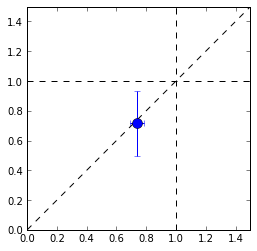

In [21]:
# CV analysis
cv_mean_bef = [np.nanmean(asso_IE50['Before'].loc[i]['raw_amp1'][-20:]) for i in asso_IE50['Before'].index]
cv_mean_aft = [np.nanmean(ave_ptl_2[i, -10:]) * cv_mean_bef[i] for i in range(ave_ptl_2.shape[0])]
               
cv_std_bef = [np.nanstd(asso_IE50['Before'].loc[i]['raw_amp1'][-5:]) for i in asso_IE50['Before'].index]
end_aft = [asso_IE50['elimi'].values[i] for i in range(len(asso_IE50))]
cv_std_aft = [np.nanstd(asso_IE50['After'].loc[i]['raw_amp1'][max(end_aft[k]*3-70,0):end_aft[k]*3]) for k,i in enumerate(asso_IE50['After'].index)]

r = [i ** 2/j ** 2 for i, j in zip([k/m for k, m in zip(cv_std_bef,cv_mean_bef)], [k/m for k, m in zip(cv_std_aft,cv_mean_aft)])]
pi = [i/j for i, j in zip(cv_mean_aft, cv_mean_bef)]


plt.errorbar(np.mean(pi), np.mean(r), np.std(r)/np.sqrt(len(r)), np.std(pi)/np.sqrt(len(pi)),  'o', markersize=10)

plt.plot(np.arange(0, 4, 0.5),np.arange(0, 4, 0.5), 'k--')
plt.plot(np.arange(0, 4, 0.5), np.ones(8),'k--')
plt.plot(np.ones(8),np.arange(0, 4, 0.5),'k--')
plt.xlim([0, 1.5])
plt.ylim([0, 1.5])
plt.axes().set_aspect('equal')
with PdfPages('/data/Figure3_13.pdf') as pdf:
    pdf.savefig()